## No show appointment dataset
I chose the No-show appointments dataset for my data investigation project which collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.


# Columns in the dataset
1. PatientId: Shows the patient's ID
2. AppointmentID: Use to identify each specific appointment
3. Gender: Shows whether the patient is a male or a female
4. ScheduledDay: Shows the day the appoinment was booked.
5. AppointmentDay: Shows the actual day of appointment.
6. Age: Shows the Age of the patient.
7. Neighbourhood: Place where the appointment took place.
8. Hypertension: Shows whether the patient has hypertension or not.
9. Diabetes: Shows whether the patient has diabetis or not.
10. Alcoholism: Shows whether the patient is alcoholic.
11. Handicap: Shows whether the patient is handicapped or not.
12. SMS_received: Showed whether the patient received the SMS or not.
13. No-Show: Was renamed to Showed, yes indicates the patient attended and no indicated the patient did not attend.


# Questions
1. Are patients likely to attend or not?
2. Does age affect attendance?
3. Does neighbourhood affect attendance?


In [1]:
#importing necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime as dt

In [2]:
#Load data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# Data Wrangling

In [3]:
#Show the first five rows of the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

The dataframe has 111,527 rows and 14 columns

In [5]:
#check datatypes of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
#check sumary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataframe does not have missing values.
ScheduledDay and AppointmentDay have a wrong datatype of object.

In [7]:
#check unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

AppointmentID is unique while patientId is not unique this shows that some patients might have booked more than 1 appointent.


In [8]:
#check descriptive statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the above data we can see that we have a minimum age of -1, inaccurate data might have been entered.

# Data Cleaning
1. correct column names.
2. Datetime type conversion.
4. Drop rows with wrong values i.e age

In [9]:
#Rename Hipertension and Handcap
df.rename(columns = {'Handcap' : 'Handicap', 'Hipertension':'Hypertension','No-show':'Showed'}, inplace=True)
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [10]:
#We will invert the values in terms of
#-1.. 0 means that the patient did not show up on time
#-2..1 means that the patient came on time
df["Showed"].replace({"Yes":"No","No":"Yes"},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [11]:
#Drop Age with a negative value
df.drop(df[df.Age < 1].index, inplace=True)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,2.558267e+14,7.133274e+04,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433600e+13,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# Exploratory Data Analysis

# Quiz 1 - Are patients Likely to attend or not?

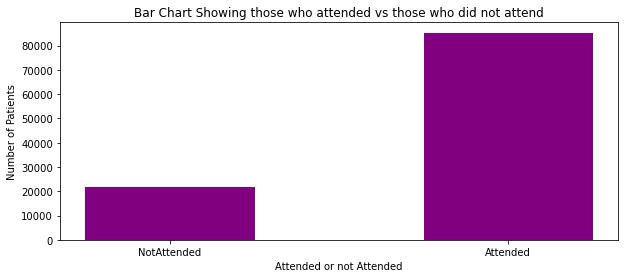

In [12]:
NotAttended=df.query("Showed== 'No'")
Attended=df.query("Showed=='Yes'")

fig = plt.figure(figsize = (10, 4))
plt.bar(['NotAttended','Attended'], [NotAttended.Showed.count(),Attended.Showed.count()], color ='purple',width = 0.5)
plt.xlabel("Attended or not Attended")
plt.ylabel("Number of Patients")
plt.title("Bar Chart Showing those who attended vs those who did not attend")
plt.show()

# Quiz 2 - Does Age Affect Attendance?

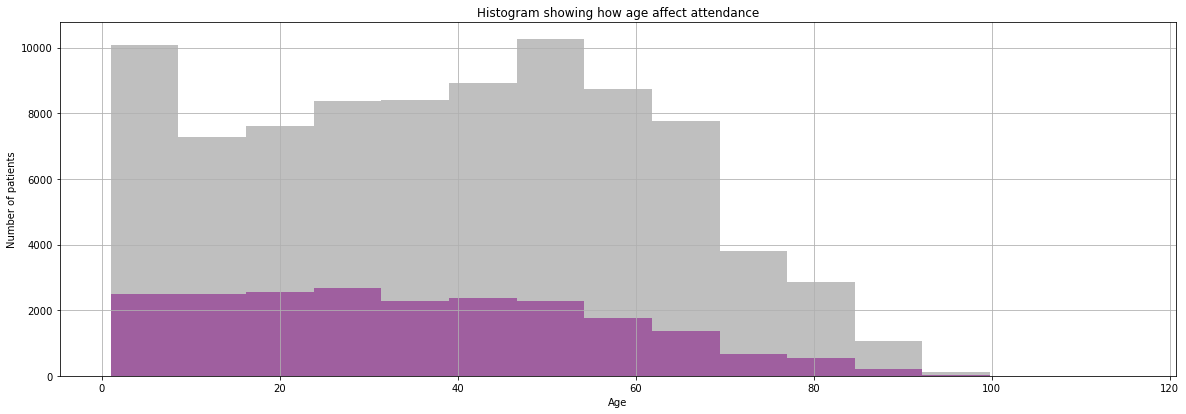

In [13]:
Attend=df.Showed=='Yes'
NotAttend=df.Showed=='No'
plt.figure(figsize=[20,6.5])
df['Age'][Attend].hist(alpha=.25,bins=15,color='black',label='Attend')
df['Age'][NotAttend].hist(alpha=.5,bins=15,color='purple',label='NoTAttend')
plt.title('Histogram showing how age affect attendance')
plt.xlabel('Age')
plt.ylabel('Number of patients');

# Quiz 3 - Does Neighbourhood Affect Attendance?

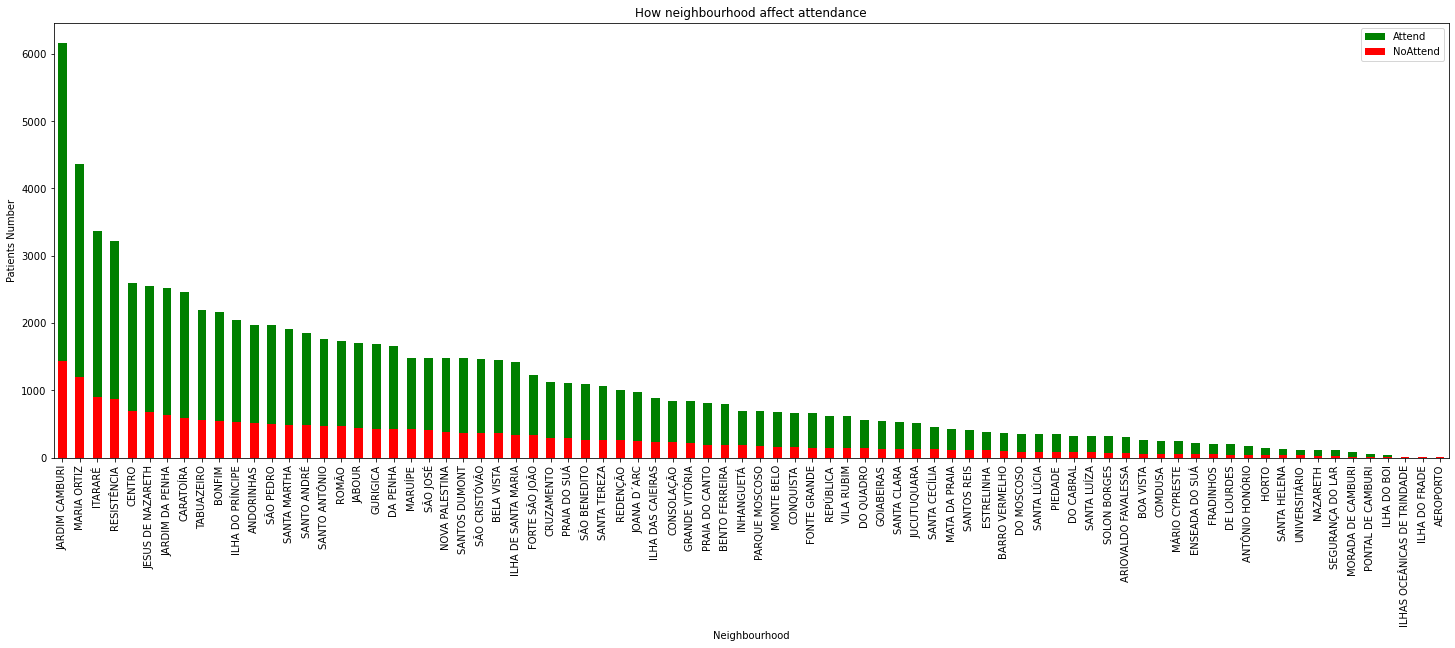

In [14]:
def Neighbourhood_effect (Attend,NotAttend):
    plt.figure(figsize=[25,8])
    df['Neighbourhood'][Attend].value_counts().plot(kind='bar',color='green',label='Attend')
    df['Neighbourhood'][NotAttend].value_counts().plot(kind='bar',color='red',label='NoAttend')
    plt.title('How neighbourhood affect attendance')
    plt.legend();
    plt.xlabel('Neighbourhood')
    plt.ylabel('Patients Number');

Neighbourhood_effect (Attend,NotAttend)

# Conclusions
1. From the bar chart we can see that patients who attend are more than those who do not attend and therefore there is a high chance that patients might attend the appointment.
2. Patients below ten years are among those who highly attend the appointment, it could be because they are being taken by their parents/guardians.
3. Patients around 50 years also are among those who highly attend the appointment, it could be because old age is approaching and they are becoming to take their health seriously.
4. Past 60 years their is a decrease in the number of patients who attend the appointment. It could be that some i.e those above 90 years doesn't have someone to take them because they are unable to walk.
5. Patients in some neighbourhoods attend the appointments than others, reason could be that it is easier to access healthcare facilities than in those neighborhoods where patient's attendance is low.


# Limitation
1. I was not able to establish relationship and other variables like hypertension, handicap and Diabetis.